# Preparing the environment

## Graphics and plotting

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
import seaborn as sea

## SQL database connection

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code:

In [3]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement!

In [5]:
%sql postgresql://mivkov@/s_cerevisiae

u'Connected: mivkov@s_cerevisiae'

# Exploration of the Interactome *S. Cerevisiae* data set

The `y2h_union` table lists interacting proteins (by name); a pair *(proteinA, proteinB)* appears in the table if *proteinA* interacts with *proteinB*.  Note that the "interacts with" relation need not be symmetric!

This describes a *directed* graph, where the proteins are the vertices and each interaction defines an edge.

Let us have a look at the `y2h_union` table:

In [37]:
%sql select * from y2h_union limit 5;

5 rows affected.


symbol_a,symbol_b
Q0085,YCR106W
TORF1,YCR106W
TORF19,YDR361C
TORF21,YKR048C
TORF47,YCR106W


Alternatively, one can load the data from the `Y2H_union.tsv` file using only Python functions:

In [7]:
data = []
with open('Y2H_union.tsv', 'r') as stream:
    for line in stream:
        data.append(line.split())

In [8]:
data[:3]

[['MEL1', 'YJL092W'], ['Q0085', 'YCR106W'], ['TORF1', 'YCR106W']]

----

*Each of the following questions admit a solution using an algorithm in Python, or just an SQL query.*

Use whichever suits you best.

## 1. How can you compute the "in-degree" of a given vertex?

In [30]:
pa, pb = zip(*data)


In [31]:
indegree=0
#name='MEL1'                 # 0
#name='YJL092W'              # 3
name='YCR106W'               # 4

for b in pb:
    if b == name:
        indegree += 1

print indegree

4


## 2. How can you compute the "out-degree" of a given vertex?

In [41]:
outdegree=0
#name='MEL1'                 # 1
#name='TORF1'                 # 1
#name='Q0085'                 # 1
#name='TORF19'                # 1
name='TORF47'                # 1

for a in pa:
    if a == name:
        outdegree += 1

print outdegree

1


## 3. How can you compute the degree (i.e., regardless of direction) of a given vertex

In [47]:
ingoing=[]
degree=0
name='YCR106W'               # 4


# get all ingoing degrees
for i,b in enumerate(pb):
    if b == name:
        ingoing.append(pa[i])
        degree+=1

#get all outgoing degrees
#test whether connection is already established 
for i,a in enumerate(pa):
    if a == name and pb[i] not in ingoing:
        degree+=1

print degree


20


## 4. How can you compute the vertex degree distribution?

[ 4.  1.  1. ...,  2.  2.  3.]
1.0 90.0


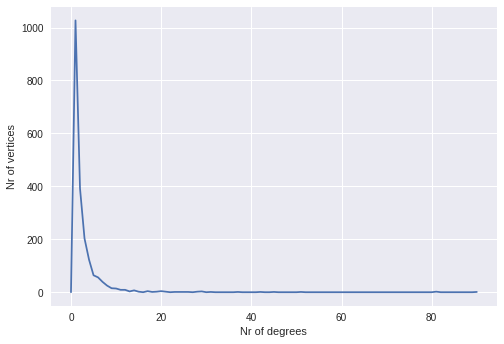

In [90]:
import numpy as np
# Get all proteins in a list

allp=list(pa)
for p in pb:
    allp.append(p)


# remove multiple entries
allp=set(allp)

# get number of proteins
npro=len(allp)



# define a function to find the degree
def degree(p):
    ingoing=[]
    degree=0

    # get all ingoing degrees
    for i,b in enumerate(pb):
        if b == p:
            ingoing.append(pa[i])
            degree+=1

    #get all outgoing degrees
    #test whether connection is already established 
    for i,a in enumerate(pa):
        if a == p and pb[i] not in ingoing:
             degree+=1

    return degree







# set up empty arrays
prots=np.zeros(npro)

# get degrees for each protein
for i,p in enumerate(allp):
    prots[i]=degree(p)
    
print prots


maxdeg=max(prots)
print mindeg, maxdeg
ndegs=int(maxdeg)+1

counts=np.zeros(ndegs)

for i in prots:
    counts[int(i)] +=1

plt.plot(range(ndegs),counts)
plt.xlabel('Nr of degrees')
plt.ylabel('Nr of vertices')

